In [3]:
import numpy as np

def lp_norm(v, p):
    if p <= 0:
        raise ValueError("Параметр p должен быть положительным числом.")

    # Вычисляем сумму абсолютных значений элементов, возведённых в степень p
    sum_abs_p = np.sum(np.abs(v) ** p)

    # Возвращаем результат, возводя сумму в степень 1/p
    return sum_abs_p ** (1 / p)

# Пример использования
if __name__ == "__main__":
    # Создаём случайный вектор
    vector = np.array([3.0, -1.0, 2.0, 1.0])

    # Вычисляем L1-норму (p = 1)
    l1_norm = lp_norm(vector, 1)
    print(f"L1-норма: {l1_norm}")

    # Вычисляем L2-норму (p = 2)
    l2_norm = lp_norm(vector, 2)
    print(f"L2-норма: {l2_norm}")

L1-норма: 7.0
L2-норма: 3.872983346207417


In [5]:
import numpy as np

def total_variation(u, p):
    if p < 1:
        raise ValueError("Параметр p должен быть больше или равен 1.")

    # Вычисляем горизонтальные и вертикальные разности
    # Функция np.diff вычисляет разности между соседними элементами массива вдоль указанной оси
    # Дополнение до 100×100 необходимо для того, чтобы массивы dx и dy имели одинаковый размер, что позволяет корректно вычислить их сумму.
    # Без этого шага программа не смогла бы выполнить сложение массивов, так как они имели бы разные размеры после применения np.diff.
    dx = np.abs(np.diff(u, axis=1))[:, :+1]
    dy = np.abs(np.diff(u, axis=0))[:+1, :]

    # Вычисляем сумму абсолютных значений разностей, возведённых в степень p
    tv_sum = np.sum((dx ** p) + (dy ** p))

    # Возвращаем результат, возводя сумму в степень 1/p
    return tv_sum ** (1 / p)

# Пример использования
if __name__ == "__main__":
    # Создаём случайное изображение
    image = np.random.rand(10, 7)

    # Вычисляем полную вариацию с L1-нормой (p = 1)
    tv_l1 = total_variation(image, 1)
    print(f"Полная вариация с L1-нормой: {tv_l1}")

    # Вычисляем полную вариацию с L2-нормой (p = 2)
    tv_l2 = total_variation(image, 2)
    print(f"Полная вариация с L2-нормой: {tv_l2}")

Полная вариация с L1-нормой: 39.90103029007973
Полная вариация с L2-нормой: 3.9254069269535368


In [13]:
# 5. Функция Хубера (смесь L₁ и L₂)
def f_huber(x, delta=1.0):
    """Функция Хубера (устойчива к выбросам)"""
    abs_x = np.abs(x)
    return np.sum(np.where(abs_x <= delta, 0.5 * x**2, delta * (abs_x - 0.5 * delta)))

# 6. Логистическая функция
def f_logistic(x):
    """Логистическая функция (для классификации)"""
    return np.sum(np.log(1 + np.exp(-x)))

# 7. Функция квадрата с порогом
def f_square_threshold(x, threshold=0.5):
    """Квадратичная функция с порогом активации"""
    return np.sum(np.where(np.abs(x) < threshold, x**2, 2*threshold*np.abs(x) - threshold**2))

# 8. Нулевая функция (для тестирования)
def f_zero(x):
    """Просто возвращает 0 (проксимальный оператор = вход)"""
    return 0

# 9. "Гребневая" функция
def f_ridge(x, epsilon=0.1):
    """Модифицированная L₂-норма с добавкой для устойчивости"""
    return np.sum(x**2 / (np.abs(x) + epsilon))

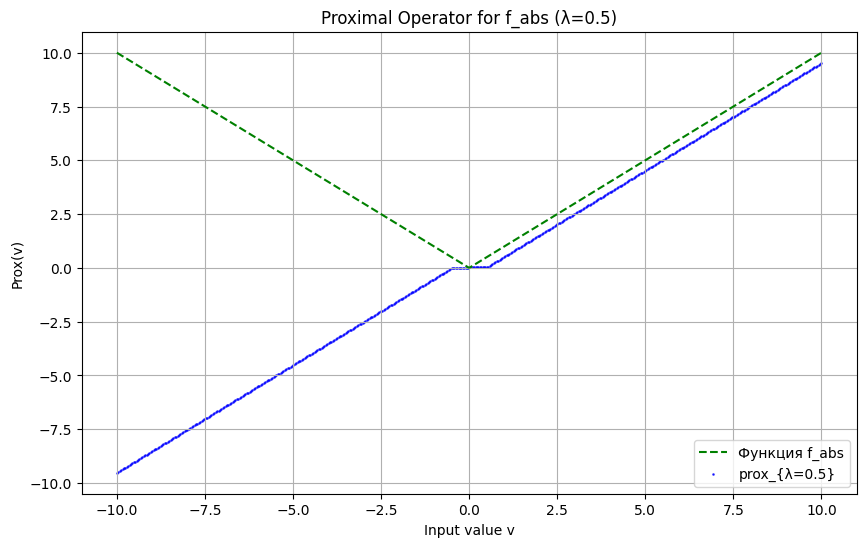

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def f_abs(x):
  return np.abs(x)

def total_variation(image, p):
    if p < 1:
        raise ValueError("Параметр p должен быть больше или равен 1.")

    # Вычисляем горизонтальные и вертикальные разности
    # Функция np.diff вычисляет разности между соседними элементами массива вдоль указанной оси
    # Дополнение до 100×100 необходимо для того, чтобы массивы dx и dy имели одинаковый размер, что позволяет корректно вычислить их сумму.
    # Без этого шага программа не смогла бы выполнить сложение массивов, так как они имели бы разные размеры после применения np.diff.
    dx = np.abs(np.diff(image, axis=1))[:, :+1]
    dy = np.abs(np.diff(image, axis=0))[:+1, :]

    # Вычисляем сумму абсолютных значений разностей, возведённых в степень p
    tv_sum = np.sum((dx ** p) - (dy ** p))

    # Возвращаем результат, возводя сумму в степень 1/p
    return tv_sum ** (1 / p)
def lp_norm(image, p):
    if p < 1:
        raise ValueError("Параметр p должен быть больше или равен 1.")

    # Вычисляем сумму абсолютных значений элементов, возведённых в степень p
    sum_abs_p = np.sum(np.abs(image) ** p)

    # Возвращаем результат, возводя сумму в степень 1/p
    return sum_abs_p ** (1 / p)
def proximal_operator(func, v, lam=0.5, x_first=-10, x_last=10, x_count=500):
    """
    Вычисляет проксимальный оператор для функции func в точке v.

    Параметры:
    func: функция, для которой вычисляется проксимальный оператор (например, L1-норма)
    v: точка, относительно которой вычисляется проксимальный оператор
    lam: параметр регуляризации (λ > 0)
    x_first, x_last, x_count: параметры для создания сетки значений x

    Возвращает:
    Результат применения проксимального оператора к точке v
    """
    x_vals = np.linspace(x_first, x_last, x_count)
     #Вычисляем значение целевой функции для каждого x
    def objective(x):
        return func(x) + (1/(2*lam)) * np.linalg.norm(x - v)**2
    result = x_vals[np.argmin([objective(x) for x in x_vals])]

    return result


def prox_plot(f, x_first=-10, x_last=10, x_count=500, lam = 0.5):
    v_values = np.linspace(x_first, x_last, x_count)
    func_values = [f_abs(x) for x in v_values]
    prox_values = [proximal_operator(f_abs, v, lam) for v in v_values]

    plt.figure(figsize=(10, 6))
    plt.plot(v_values, func_values,  'g--', label=f'Функция {f.__name__}')
    plt.scatter(v_values, prox_values, s=0.8, c='b',marker='o', alpha=0.75, label=f'prox_{{λ={lam}}}')
    plt.title(f'Proximal Operator for {f.__name__} (λ={lam})')
    plt.xlabel('Input value v')
    plt.ylabel('Prox(v)')
    plt.grid(True)
    plt.legend()
    plt.show()

prox_plot(f_abs, x_first=-10, x_last=10, x_count=500, lam = 0.5)




